# Háromszög csempék

Minta a valóságban:</br>
![generative_2](figures/generative_2.png)

Minta generálva:</br>
![generative_3](figures/generative_3.png)

<b>Forrás:</b> {cite:p}`vuenc`

<b>Jellemzők:</b>
- a minta négyzetekből áll, amik felváltva egyik vagy másik átló szerint derékszögű háromszögekre vannak osztva
- minden háromszög véletlen színű az előre meghatározott színekből
- előfordulnak 2, vagy 4 azonos színű háromszögből összeálló nagyobb háromszögek

## 1. Alapok

Importáljuk a szükséges könyvtárakat és meghatározzuk az alap paramétereket.

![generative_9](figures/generative_9.png)

## Szükséges könyvtárak telepítése és importálása

In [1]:
from PIL import Image, ImageDraw
import random

<b>Paraméterek megadása:</b>

In [2]:
#paraméterek
image_width = 1000
image_height = 600
frame = 50
colors = [(42,123,188),(71,52,52),(47,50,68),(133,187,185),(46,95,140),(218,118,28),(222,42,25),(186,198,214)]

<b>Sokszög (polygon) létrehozása ciklussal:</b>

Az ábrán látható alakzatot (derékszögű háromszög) legegyszerűbben a <code>draw.polygon</code> utasítással tudjuk megadni.

<code>pickColor()</code> függvény véletlen színt választ a megadott listából.

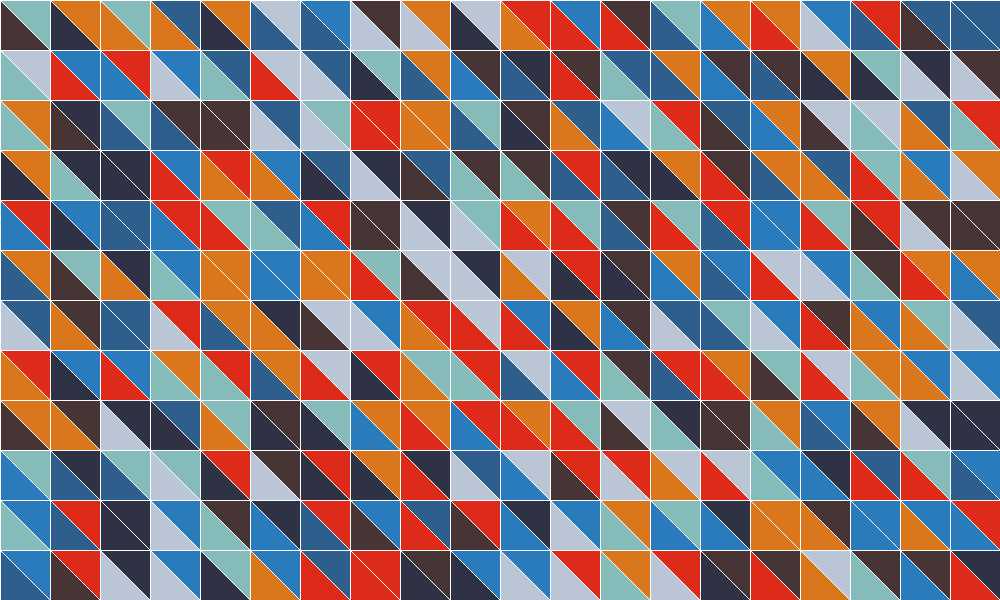

In [3]:
image = Image.new("RGB", (image_width, image_height), "black")
draw = ImageDraw.Draw(image)

def pickColor():
    color = random.choice(colors)
    return color

for i in range(0,image_width,frame):
    for j in range(0,image_height,frame):
        draw.polygon([i,j,i,j+frame,i+frame,j+frame],fill=pickColor(),outline="white",width=1)
        draw.polygon([i,j,i+frame,j,i+frame,j+frame],fill=pickColor(),outline="white",width=1)

display(image)

## 2. Átlók javítása

Eredeti képen látható, hogy a háromszögek kialakítása átló szerint felváltva kerül kialakításra. Ezt elérhetjük több módon például az ellentétes átlók váltakoztatásával. 

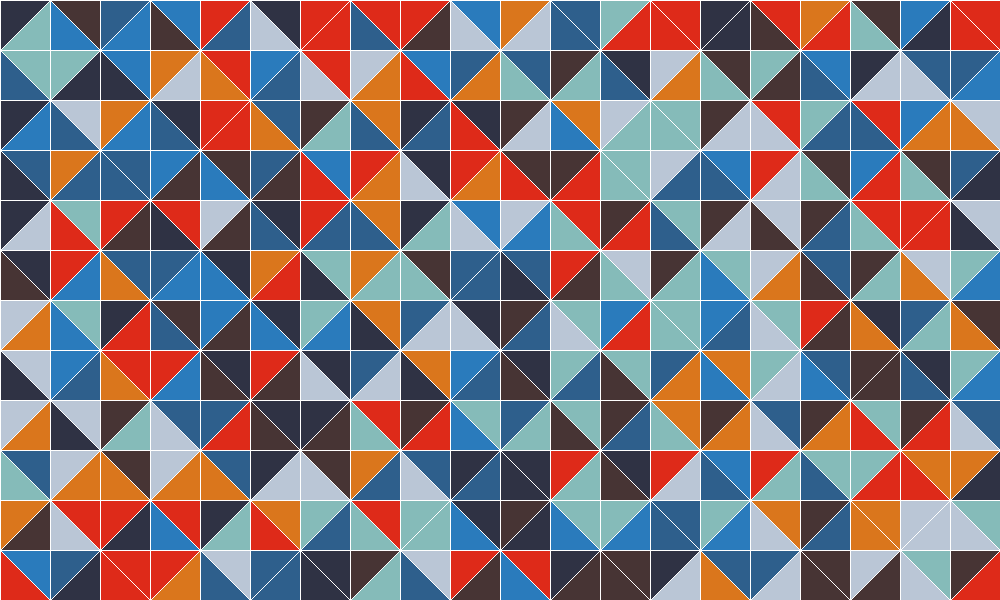

In [4]:
x=0

# Create image
image = Image.new("RGB", (image_width, image_height), "black")
draw = ImageDraw.Draw(image)

def pickColor():
    color = random.choice(colors)
    return color


for i in range(0,image_width,frame):
    x += 1
    for j in range(0,image_height,frame):        
        if x % 2==0:
            draw.polygon([i,j,i,j+50,i+50,j+50],fill=pickColor(),outline="white",width=1)
            draw.polygon([i,j,i+50,j,i+50,j+50],fill=pickColor(),outline="white",width=1)            
        else:
            draw.polygon([i,j,i,j+50,i+50,j],fill=pickColor(),outline="white",width=1)
            draw.polygon([i,j+50,i+50,j+50,i+50,j],fill=pickColor(),outline="white",width=1)
        x+=1            

display(image)

## 3. Négyzet szektorainak meghatározása

Az eredmény már kezd hasonlítani a mellékelt referenciákhoz, azonban a használt színeket és mintákat illetően vannak bizonyos megkötések. A mintákhoz egy egységnek vegyünk alapul egy négyzetet, amit 8 darab szomszédos háromszög alkot. Ezeknél javasolt valamilyen sorrendet kialkaítani.

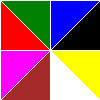

In [5]:
from PIL import Image, ImageDraw
import random

# Paraméterek
width = 1
outline = "white"
i,j = 0,0
square_width = 100
square_height = 100

image = Image.new("RGB", (square_width, square_height), "black")
draw = ImageDraw.Draw(image)

def pickColor():
    color = random.choice(colors)
    return color

draw.polygon([i+50,j,i+50,j+50,i+100,j],fill="blue",outline=outline,width=width)            #1. szektor
draw.polygon([i+50,j+50,i+100,j+50,i+100,j],fill="black",outline=outline,width=width)       #2. szektor
draw.polygon([i+50,j+50,i+100,j+50,i+100,j+100],fill='yellow',outline=outline,width=width)  #3. szektor
draw.polygon([i+50,j+50,i+50,j+100,i+100,j+100],fill="white",outline=outline,width=width)   #4. szektor
draw.polygon([i,j+100,i+50,j+100,i+50,j+50],fill="brown",outline=outline,width=width)       #5. szektor  
draw.polygon([i,j+50,i,j+100,i+50,j+50],fill="magenta",outline=outline,width=width)         #6. szektor
draw.polygon([i,j,i,j+50,i+50,j+50],fill="red",outline=outline,width=width)                 #7. szektor 
draw.polygon([i,j,i+50,j,i+50,j+50],fill="green",outline=outline,width=width)               #8. szektor
            
display(image)

## 4. megoldás

Az eredeti képen a háromszögek gyakran nagyobb háromszögeket alkothatnak. Ezt véletlen számok segítségével kezeljük, ami meghatározott intervallumok alapján mintát jelölő karakterláncot ad vissza.

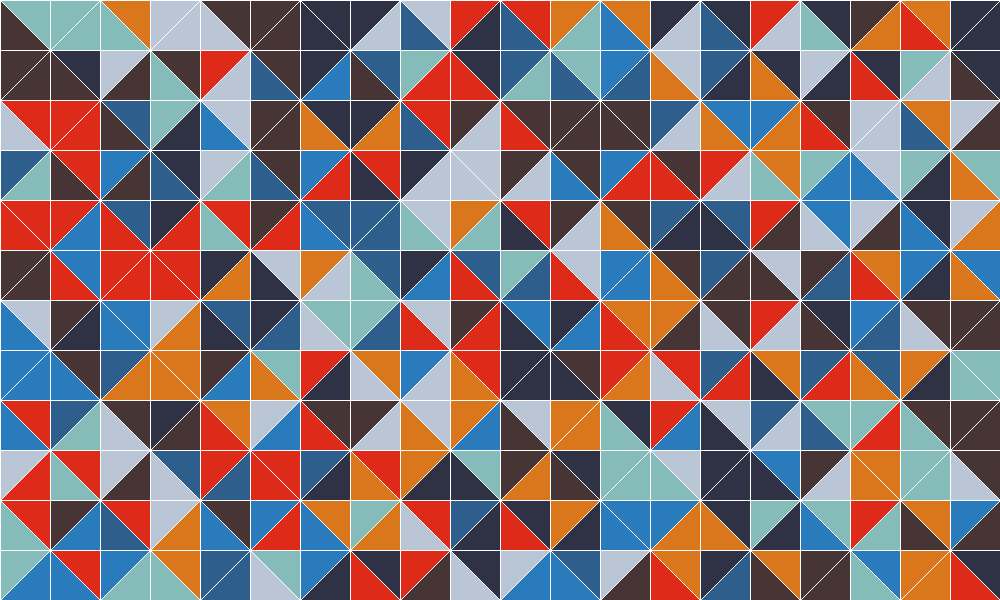

In [6]:
from PIL import Image, ImageDraw
import random

# Paraméterek
width = 1
outline = "white"

image = Image.new("RGB", (image_width, image_height), "black")
draw = ImageDraw.Draw(image)

def pickColor():
    color = random.choice(colors)
    return color

def drawSquare(pattern):
    polygons = ([i+50,j,i+50,j+50,i+100,j],
            [i+50,j+50,i+100,j+50,i+100,j],
            [i+50,j+50,i+100,j+50,i+100,j+100],
            [i+50,j+50,i+50,j+100,i+100,j+100],
            [i,j+100,i+50,j+100,i+50,j+50],
            [i,j+50,i,j+100,i+50,j+50],
            [i,j,i,j+50,i+50,j+50],
            [i,j,i+50,j,i+50,j+50])
    
    color = pickColor()
    for char in range(len(pattern)):        
        if pattern[char] == "1":
            draw.polygon(polygons[char],fill=color,outline=outline,width=width)                        
        else:
            draw.polygon(polygons[char],fill=pickColor(),outline=outline,width=width)        

for i in range(0,image_width,frame*2):
    for j in range(0,image_height,frame*2):        
        x = random.randint(0,100)
        if x < 3:
            drawSquare("01111000")            
        elif x < 6:
            drawSquare("00011110")            
        elif x < 9:
            drawSquare("10000111")            
        elif x < 12:
            drawSquare("11100001")            
        elif x <= 21:
            drawSquare("10000001")            
        elif x <= 31:
            drawSquare("01100000")            
        elif x <= 41:
            drawSquare("00011000")            
        elif x <= 51:
            drawSquare("00000110")            
        else:
            drawSquare("00000000") 

display(image)